In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading CSV file 

In [3]:
#pd.read_csv() is a function provided by the pandas library in Python used to read comma-separated values (CSV) files into a DataFrame.
df = pd.read_csv("Diwali Sales Data.csv",encoding= "unicode_escape")

DataFrame attributes 

In [4]:
#it returns the number of rows and columns in the DataFrame.
df.shape

(11251, 15)

In [5]:
#df.size give you the total number of cells (rows * columns) in the DataFrame. (rows, columns)
df.size

168765

In [26]:
#df.columns is an attribute in pandas DataFrame objects that returns a list-like object containing the column labels of the DataFrame.
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [6]:
# includes  information about the index dtype and columns, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# It provides information such as count, mean, standard deviation, minimum, maximum, and various percentiles of the data distribution for each numerical column. 
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [8]:
#The df.head() method in pandas is used to display the first few rows of a DataFrame.
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Prepare Data

In [9]:
#drop() method in pandas is used to remove rows or columns from a DataFrame. 
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [14]:
#pd.isnull() is a function provided by the pandas library in Python used to detect missing (NaN) values in a DataFrame or Series.
pd.isnull(df).sum()
#here as you can see the amount column has 12 missing/nan values.

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
#df.dropna() is a method provided by pandas DataFrame objects used to remove rows or columns containing missing values (NaNs). 
df.dropna(inplace=True)

In [19]:
#check again for any missing/nan values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [22]:
#astype() method in pandas is used to cast the data type of a DataFrame or Series to a specified data type.
df["Amount"] = df["Amount"].astype("int32")

# Data Analysis 

Gender Analysis 

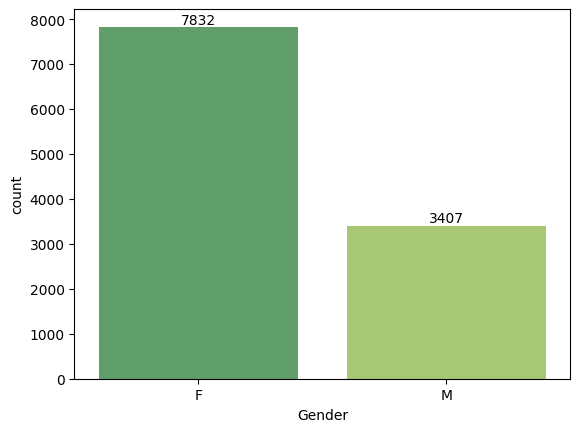

In [196]:
gender = sns.countplot(x="Gender",hue="Gender",data = df,palette='summer');
for bars in gender.containers:
    gender.bar_label(bars)

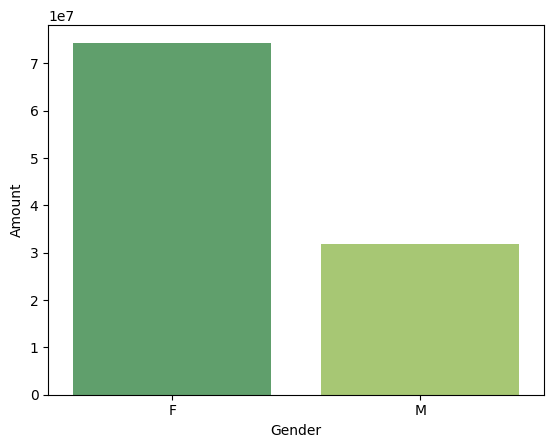

In [195]:
sales_by_gender = df.groupby(("Gender"),as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

sns.barplot(x="Gender",hue="Gender",legend=False,y="Amount",data=sales_by_gender,palette='summer');


from above graph it is clear that most of the orders are placed by female 
and also the purchase amount of females greter than men.

Age Groups Analysis

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

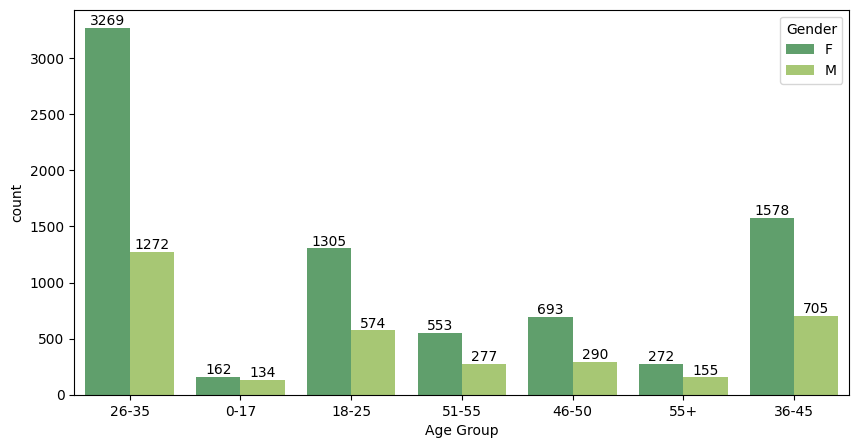

In [194]:
plt.figure(figsize=(10,5))
ax =sns.countplot(x="Age Group",hue="Gender",data=df,palette='summer');

for bars in ax.containers:
    ax.bar_label(bars)

from above graphs you can esily identify that most of the buyers are of age group 
between 26-35, in which most of them are female.


<Axes: xlabel='Age Group', ylabel='Amount'>

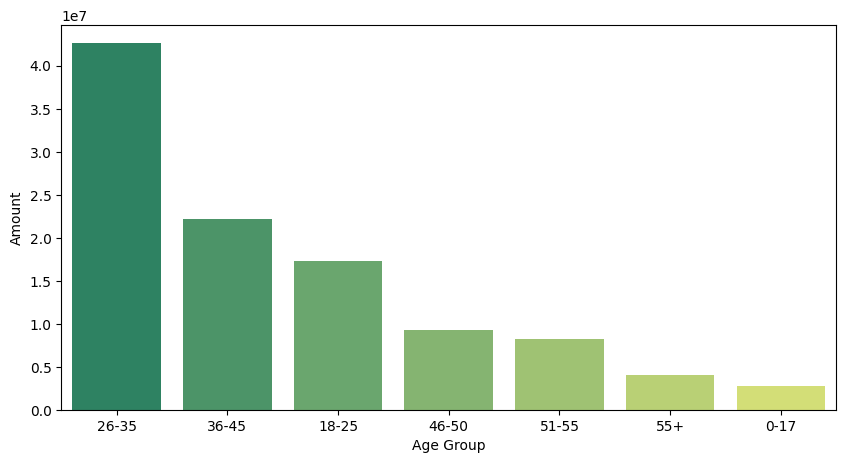

In [193]:
plt.figure(figsize=(10,5))
age_amount= df.groupby(("Age Group"),as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group",y="Amount",hue="Age Group",legend=False,data = age_amount,palette='summer')



From avobe graph , we can identified that age group between 26-35 has spend most and age group 0-17 has is lowest.

Top 10 states with most number of orders

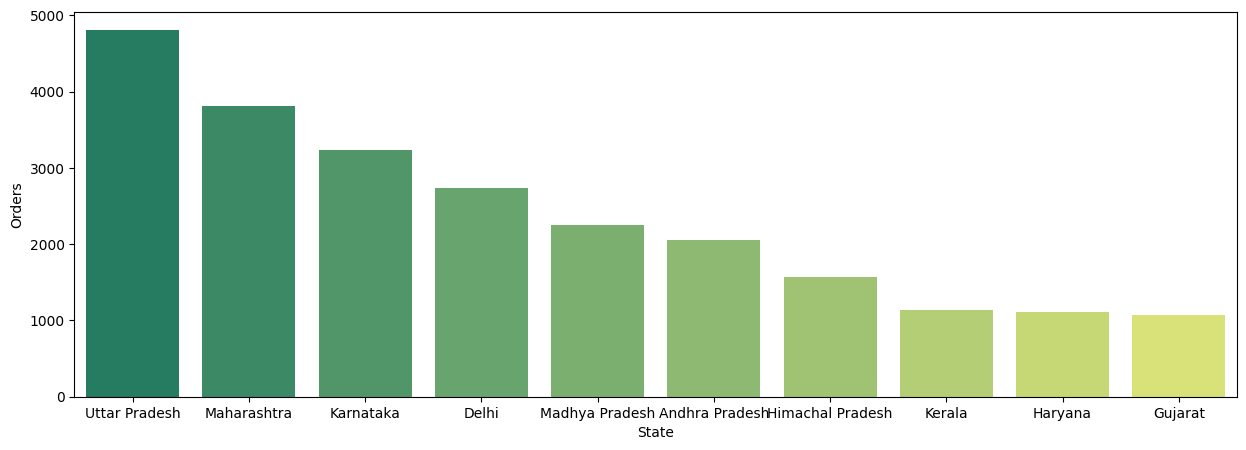

In [192]:
orders_TopState=df.groupby(("State"),as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x="State",y="Orders",hue="State",legend=False,data=orders_TopState,palette='summer');

 These are the top 10 states from where most of the orders are coming in which you can see Uttar Pradesh and Maharashtra is in top spot.

Top 10 states respect to amount spend

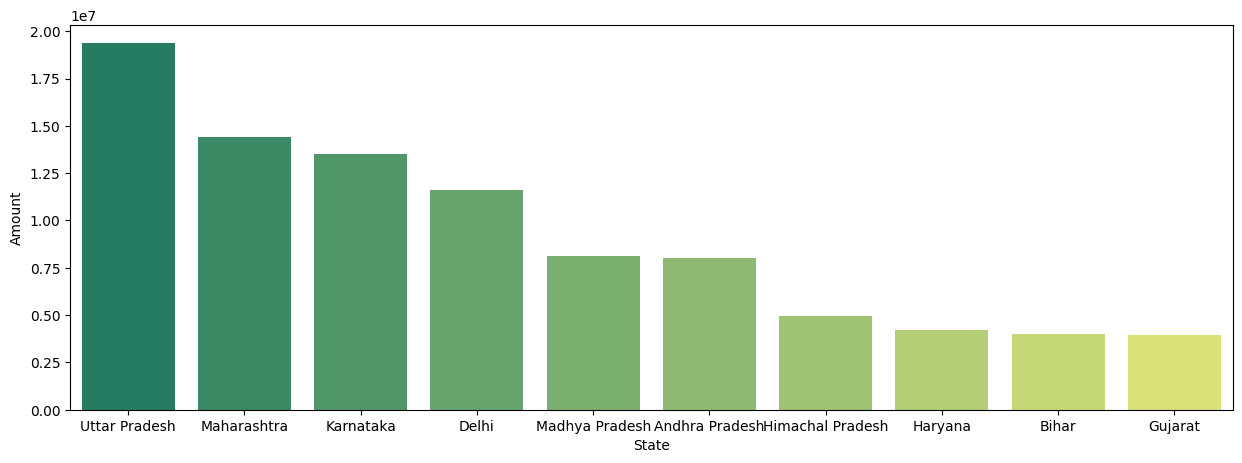

In [191]:
TotalAmount_state= df.groupby(("State"),as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x="State",hue="State",y="Amount",data=TotalAmount_state,legend=False,palette='summer');

so, Uttar Pradesh, Maharashtra and Karnataka are the top states from where most of the revenue being generated.

# Marital Status 

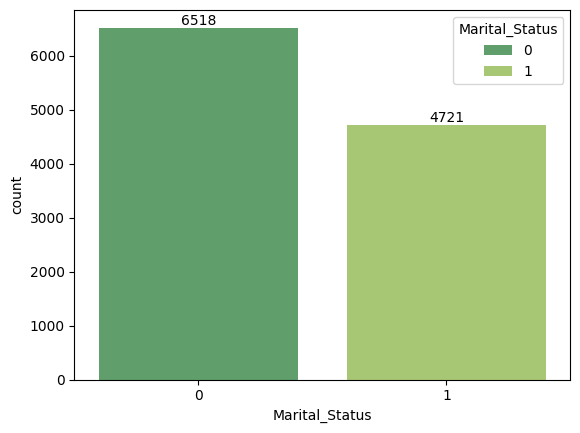

In [190]:
ax = sns.countplot(x="Marital_Status",hue="Marital_Status",data=df,palette="summer")
for bars in ax.containers:
    ax.bar_label(bars)

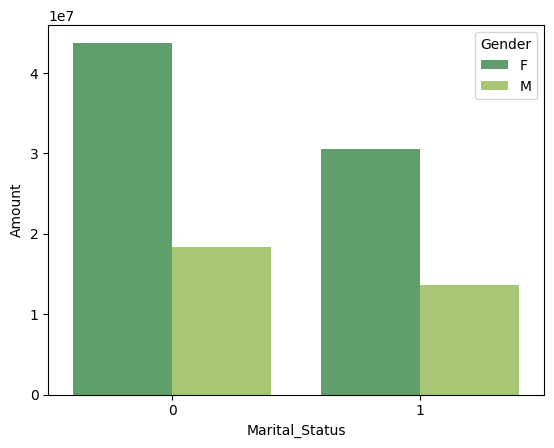

In [189]:
state_sales=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Marital_Status",y="Amount",hue="Gender",data=state_sales,palette="summer");


the above graphs shows that most of the buyers are married and most of them is women.

# Occupation 

<Axes: xlabel='Occupation', ylabel='count'>

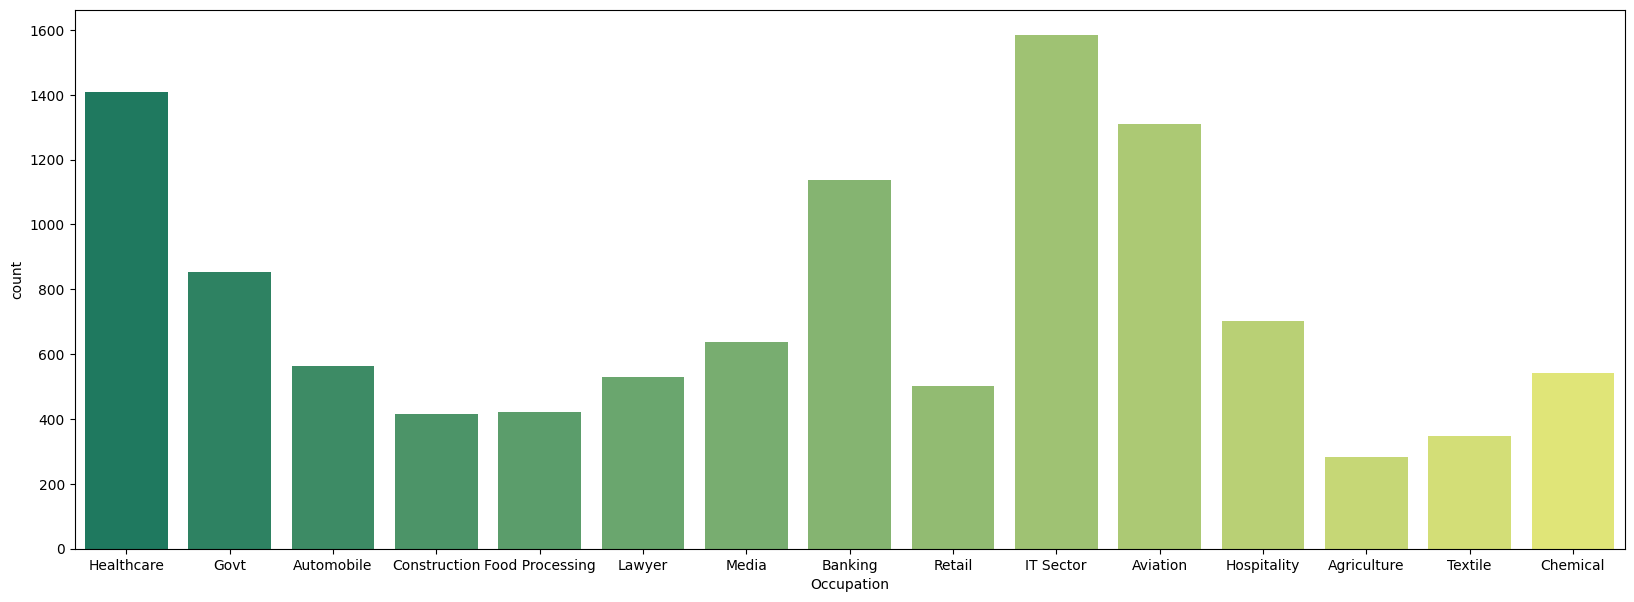

In [213]:
plt.figure(figsize=(20,7))
sns.countplot(x="Occupation",hue="Occupation",legend=False,data=df,palette="summer")

<Axes: xlabel='Occupation', ylabel='Amount'>

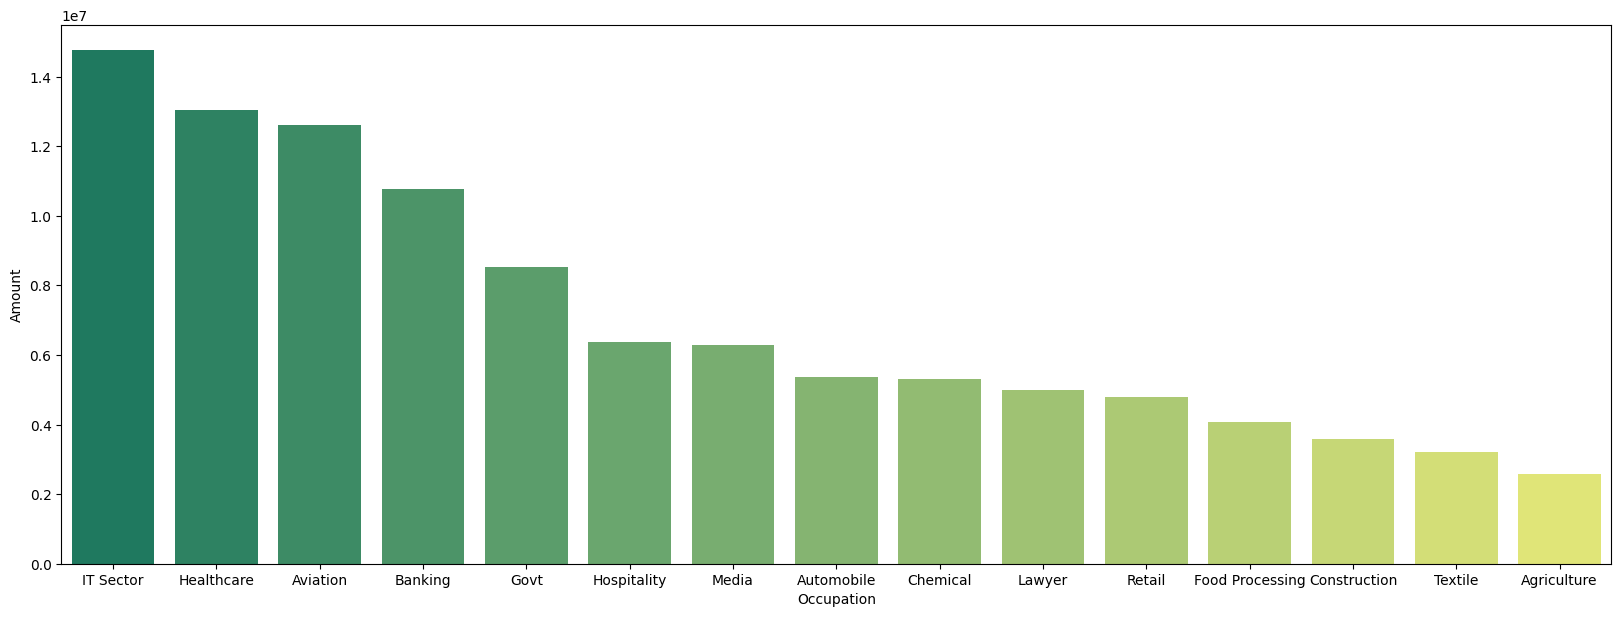

In [211]:
occupation_amount=df.groupby("Occupation",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
plt.figure(figsize=(20,7))

sns.barplot(data= occupation_amount,x="Occupation",hue="Occupation",y="Amount",legend=False,palette="summer")

as you can see above the most number of purchase has came from peopple working in IT Sector, Healthcare and Aviation. 

# Product 

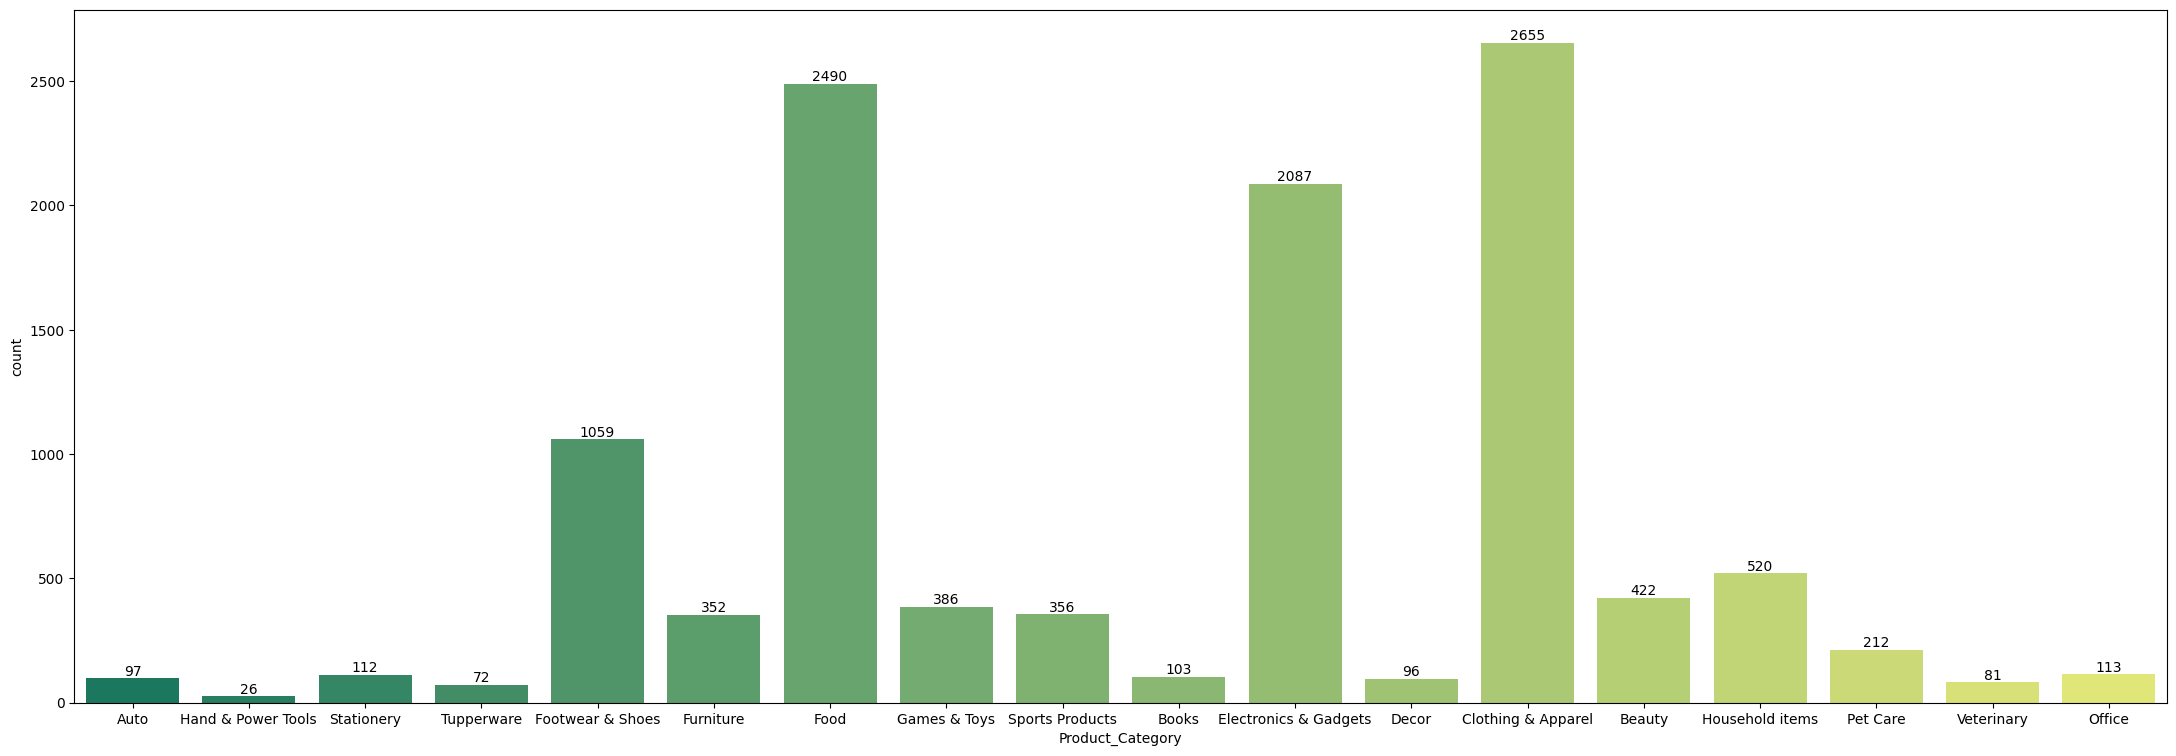

In [238]:
plt.figure(figsize=(27,9))
x=sns.countplot(x="Product_Category",hue="Product_Category",legend=False,data=df,palette="summer")
for bars in x.containers:
    x.bar_label(bars)

The above graph show us that clothing & Apparel , Food  and Electronics & Gadgets are the top three catogry which recieve most of the orders. apart from this three , footwear & shoes,Household items and beauty product are recieve most orders.

<Axes: xlabel='Product_Category', ylabel='Amount'>

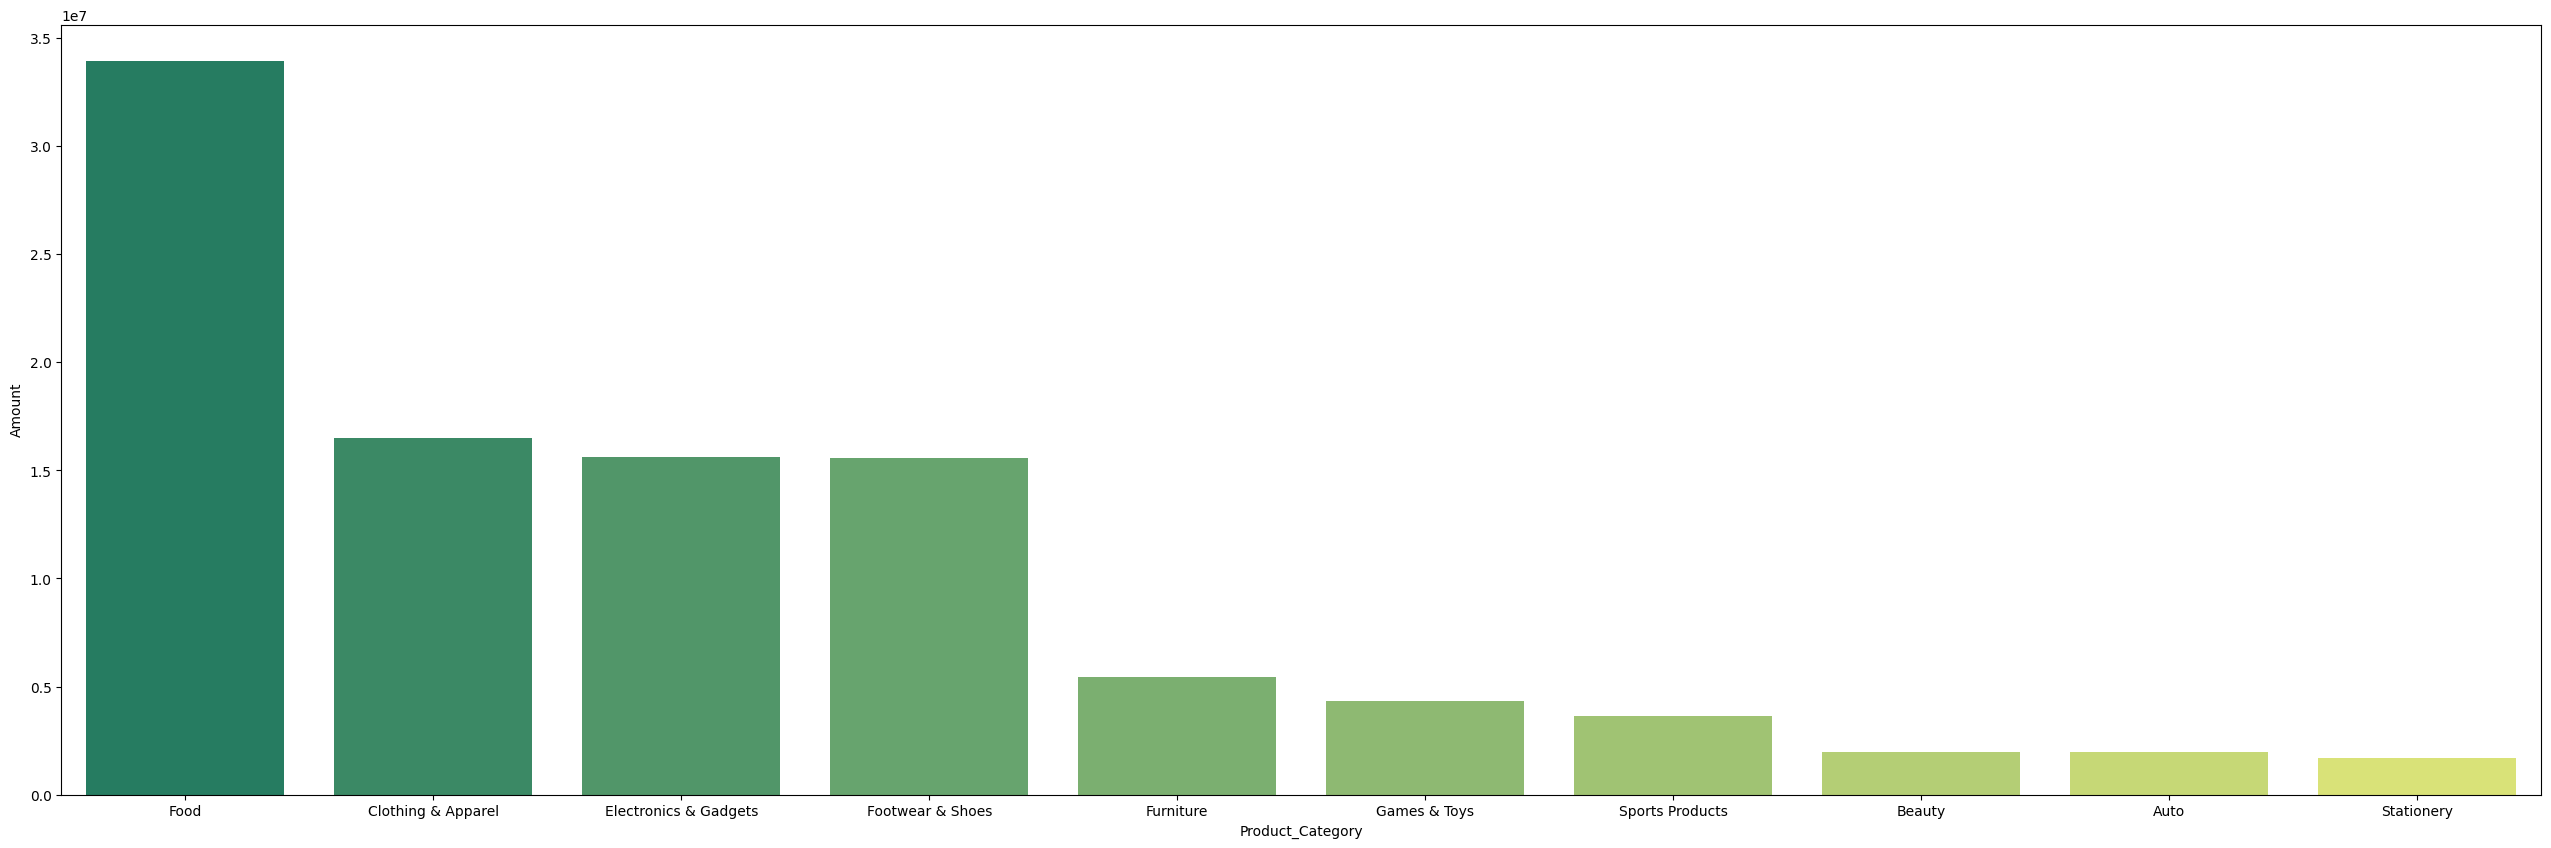

In [239]:
product_amount=df.groupby("Product_Category",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
plt.figure(figsize=(32,10))
sns.barplot(x="Product_Category",y="Amount",hue="Product_Category",legend=False,data=product_amount,palette="summer")


Food , Clothing & Apparel, Electronics & Gadget and Footwear and Shoes are the top Four category which generate most of the revenue.

<Axes: xlabel='Product_ID', ylabel='Amount'>

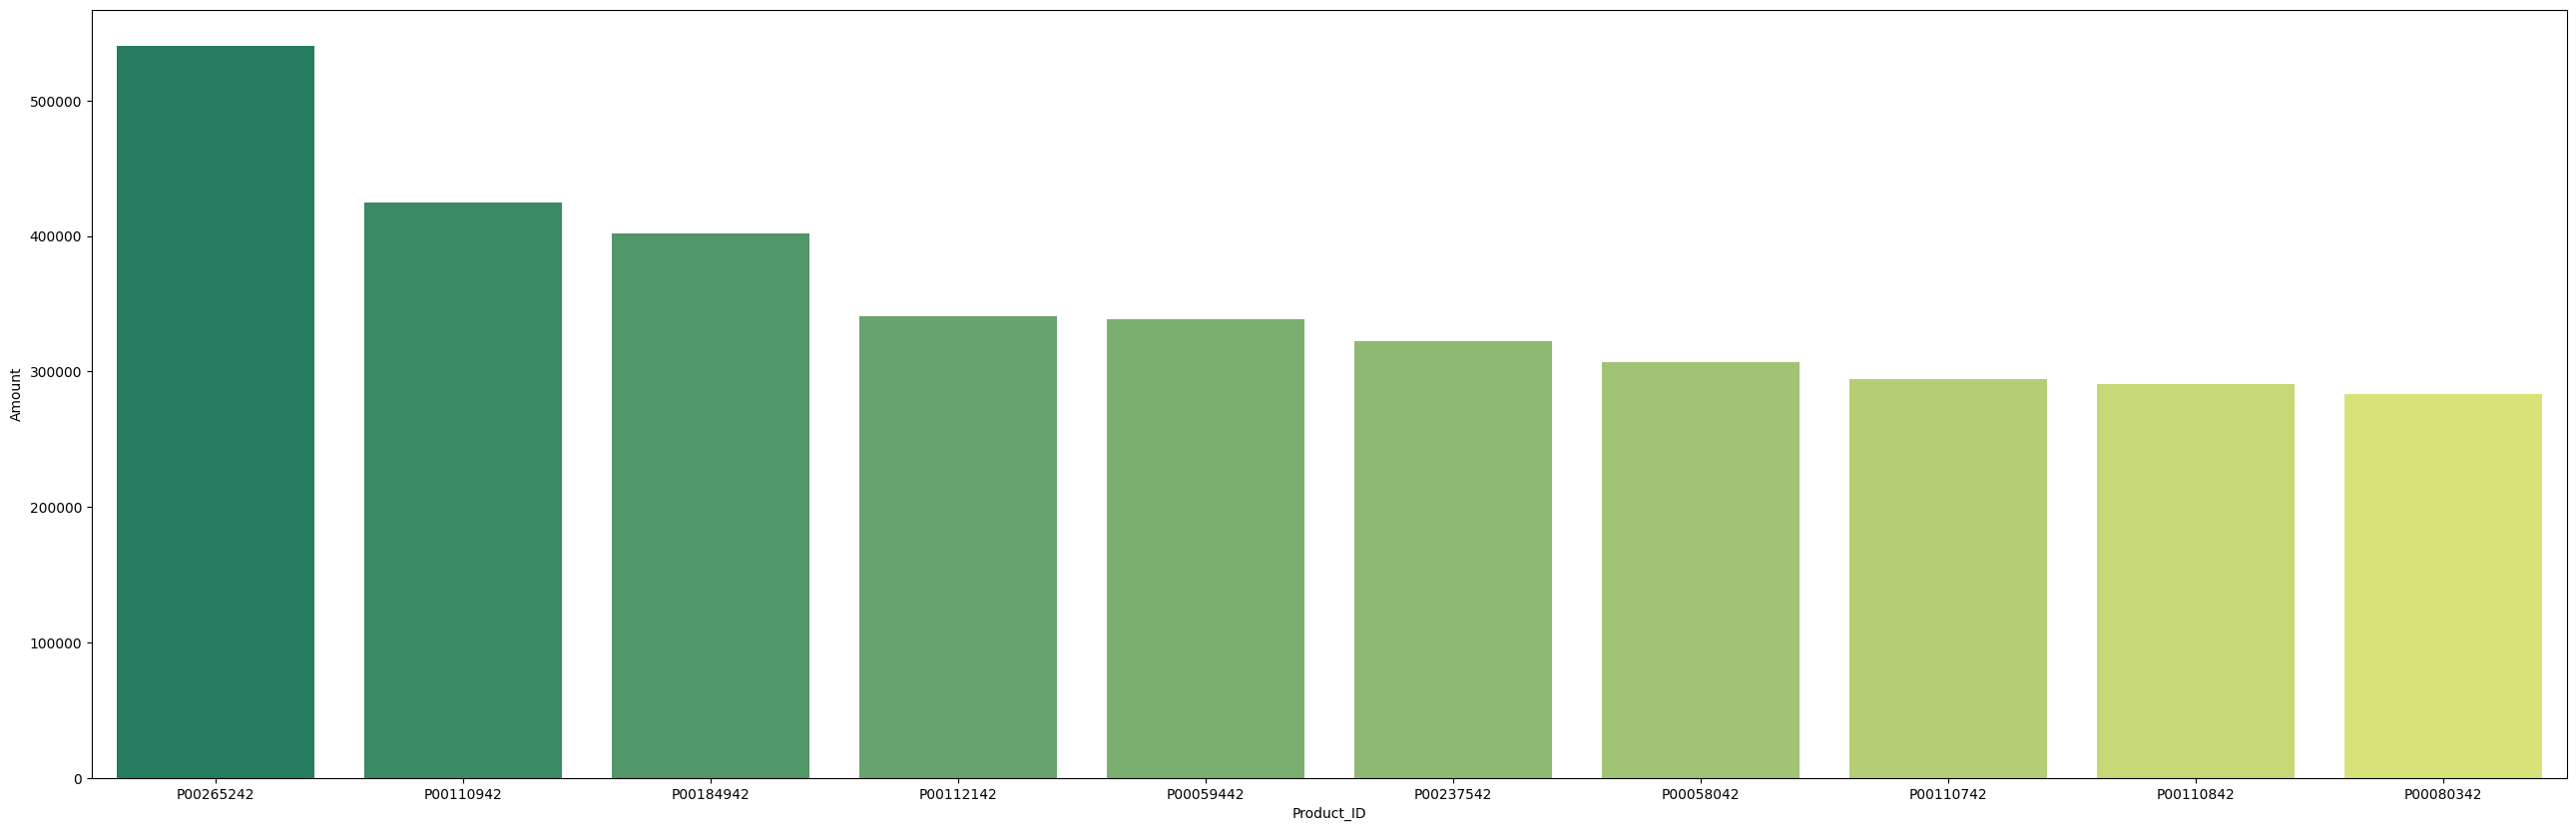

In [247]:
productid_amount=df.groupby("Product_ID",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
plt.figure(figsize=(32,10))
sns.barplot(x="Product_ID",y="Amount",hue="Product_ID",legend=False,data=productid_amount,palette="summer")


these are the top ten selling product from all the product category.

<Axes: xlabel='Product_Category', ylabel='Amount'>

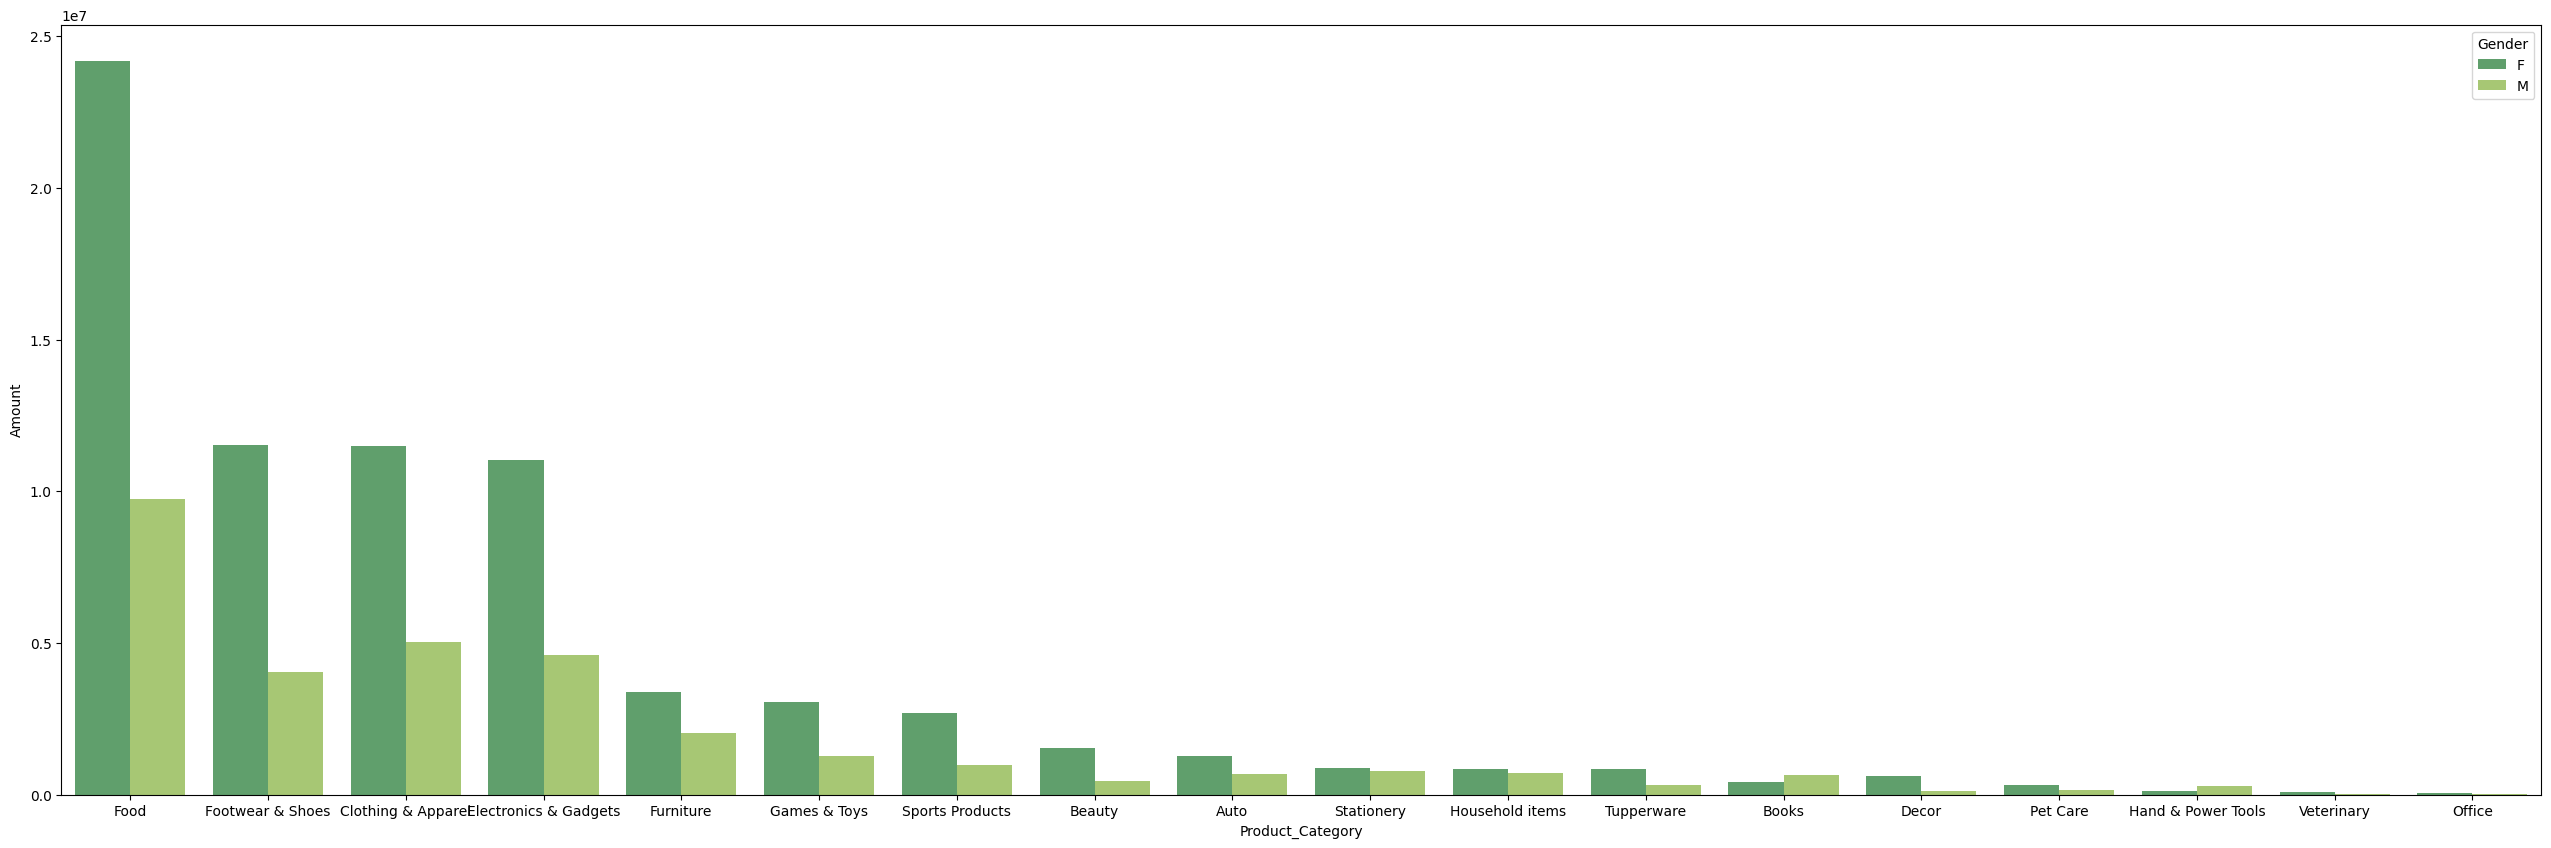

In [246]:
product_gender=df.groupby(["Product_Category","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
plt.figure(figsize=(32,10))
sns.barplot(x="Product_Category",y="Amount",hue="Gender",data=product_gender,palette="summer")

above you can see that in most of all product category female buyes are more in compare to men. only category is where men buyres is more is 
Books and hand & Power tools.

# Data Analysis Report: Online Shopping Platform

## Introduction

This report presents the findings of a comprehensive analysis of an online shopping platform dataset. The dataset includes information on customer demographics, product categories, orders, and revenue generation. The analysis was conducted using Python, along with libraries such as NumPy, pandas, Matplotlib, Seaborn, and Jupyter Notebook.

## Data Preparation

The dataset underwent a data preparation process, which involved studying the dataset and handling missing values. Missing values were removed from the dataset using the pandas library to ensure the integrity of the analysis.

## Key Findings

### 1. Product Category Analysis

- **Top Three Categories by Orders:**
  1. Clothing & Apparel
  2. Food
  3. Electronics & Gadgets

- **Additional Popular Categories by Orders:**
  - Footwear & Shoes
  - Household Items
  - Beauty Products

- **Top Four Categories by Revenue:**
  1. Food
  2. Clothing & Apparel
  3. Electronics & Gadgets
  4. Footwear & Shoes

### 2. Buyer Analysis

- **Marital Status and Gender:**
  - Most buyers are married, with a significant majority being women.

- **Age Group of Buyers:**
  - The majority of buyers fall within the age group of 26-35.

### 3. Geographic Analysis

- **Top States by Orders:**
  1. Uttar Pradesh
  2. Maharashtra
  3. Karnataka
  4. Delhi

- **Top States by Revenue:**
  1. Uttar Pradesh
  2. Maharashtra
  3. Karnataka
  4. Delhi

### 4. Buyer's Working Field Analysis

- **Top Working Fields of Buyers:**
  - IT Sector
  - Healthcare
  - Aviation

## Data Visualization

Data visualization played a crucial role in showcasing the findings. Matplotlib and Seaborn libraries were utilized to create bar plots and count graphs, which effectively presented the analysis results.

## Conclusion

The analysis of the online shopping platform dataset reveals several insights into customer behavior, product preferences, and geographic trends. Understanding these patterns can help optimize marketing strategies, inventory management, and customer engagement efforts. Further analysis and targeted actions can be undertaken based on these findings to drive business growth and enhance customer satisfaction.
